# Ballarat Green Waste Data Analysis

Welcome to my mini-project analysing a fairly randomly selected dataset from the Australian Government's open data website data.gov.au.

#### About me and the project
I am relatively new to the field of Data Science and my reason for completing this mini-project is to hone my skills as a Data Scientist and begin to build a portfolio of work. My main aim here was to practice different data manipulation techniques, visualisations and Python coding.

#### The dataset
The dataset is called Ballarat Kerbside Green Waste Deliveries and was provided by the City of Ballarat. It was created on 05/09/2019 and last updated 05/09/2019. A .csv copy of the of the data can be found on this repository.

In the intro, I said this was a 'fairly random' dataset. That's because although I stumbled upon this one randomly while browsing through the data.gov.au catalogue looking for some data to analyse, I specifically chose it because of the fact it had just 3 features.

Why something so small and simple? I was keen to show that no matter how simple a dataset may be, there is still a lot you can do with it and there are many different insights we can draw from it.

As there was no partcular objective and I was just exploring the data, I had no pre-conceived ideas about what the analysis was going to focus on and the project evolved as I went. I will also mention there is no advanced statistical learning or 'flashy data science stuff' below, it's mainly data aggregation, manipulation and visualisations. In future projects I plan to be much more selective with the datasets chosen and also use some more advanced techniques.

#### Let's get it started!

As with all projects, let's start by importing some libraries.

I have imported the usual **pandas** and **numpy** to manipulate and analyse the data. In addition I imported **calendar** and a subset of the **datetime** library as I needed to do some work using dates within some dataframes and visualisations.

I also imported a subset of **matplotlib** and **seaborn** for my visualisations.

In [1]:
#Importing libraries for data analysis and visualisation.
import pandas as pd
import numpy as np
from datetime import datetime
import calendar

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
sns.set(color_codes=True)

We'll now have a look at the structure of the data, the features and try to get a feel for the dataset by looking at a few rows.

I already had a quick glance at the CSV file and recognised there was a date columnn, so I have parsed the column and converted it to datetime format up front.

In [2]:
#Read CSV file and parse dates then display head of dataframe
gw_data = pd.read_csv('kerbside-green-waste.csv', parse_dates=['date'])
gw_data['date'] = pd.to_datetime(gw_data['date'])
gw_data.head(20)

,date,vehicle,weight
0,2016-07-04,13.0,6.80
1,2016-07-04,24.0,6.08
2,2016-07-04,14.0,6.70
3,2016-07-05,24.0,2.80
4,2016-07-05,13.0,9.50
5,2016-07-05,14.0,10.71
6,2016-07-06,14.0,7.20
7,2016-07-06,24.0,6.04
8,2016-07-06,13.0,10.75
9,2016-07-07,13.0,10.90


In [3]:
#Count values in dataframe
gw_data.count()

date       3997
vehicle    3715
weight     3996
dtype: int64

In [4]:
#Check data types
gw_data.dtypes

date       datetime64[ns]
vehicle           float64
weight            float64
dtype: object

In [5]:
#Obtain some simple statistics over data
gw_data.describe()

,vehicle,weight
count,3715.000000,3996.000000
mean,13.951548,6.961064
std,1.616028,3.687592
min,1.000000,0.000000
25%,13.000000,4.380000
50%,14.000000,6.940000
75%,15.000000,9.325000
max,25.000000,69.840000


At this point we can start to make a few assumptions about the data. In a commercial setting you would most likely obtain more information about the dataset from the point of origination or the owner. However, my goal is simply to practice analysis techniques so I have not taken that step and would rather see if we can work some things out independently. 

Firstly, the vehicle column appears to have recurring values that repeat over several dates. There are also date values that repeat and a value for weight and vehicle associated with each date value. I concluded from this that the vehicle column must be an identifier for each specific vehicle rather than say the number of vehicles out collecting waste on a particular day. As a consquence, the stats above for the vehicle column will not make much sense right now.

Secondly, the value count for the vehicle and weight columns is lower than the date column. There appear to be some missing values. Let's see if we can confirm this.

In [6]:
#Count null values
gw_data.isnull().sum()

date         0
vehicle    282
weight       1
dtype: int64

There is only one weight value missing but 282 or around 7% of the rows are missing a vehicle value. Let's see where these are.

In [7]:
#Create dataframe of null vehicle values
gw_data_nulls = gw_data[gw_data.vehicle.isnull() == True].copy()
gw_data_nulls

,date,vehicle,weight
93,2016-08-12,NaN,1.280
338,2016-11-18,NaN,5.400
361,2016-11-24,NaN,5.900
363,2016-11-24,NaN,10.500
367,2016-11-25,NaN,5.850
368,2016-11-25,NaN,10.350
370,2016-11-25,NaN,10.300
374,2016-11-28,NaN,5.260
377,2016-11-28,NaN,9.900
378,2016-11-28,NaN,9.850


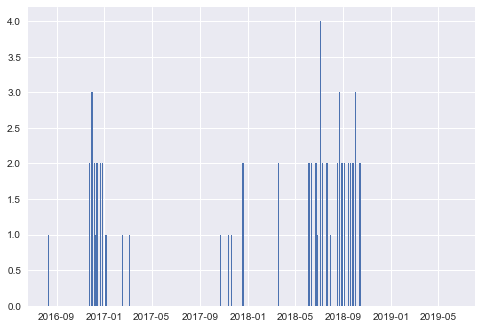

In [8]:
#Plotting the null values on a timeline
gw_data_nulls_1 = gw_data_nulls[['date', 'weight']].copy().groupby('date').count()

x_axis = gw_data_nulls_1.index
y_axis = gw_data_nulls_1['weight']

plt.bar(x_axis, y_axis)
plt.show()

Unfortunately, there is some concentration of these null values around two particular periods in the timeline of the data. It's possible the information was not being collected or there may have been an issue with tracking processes during these times.

For any critical analysis, it must be recognised the concentration issue could potentially pose a problem with any inferences made from the dataset and should be dealt with, but we will push along regardless and just drop these rows for simplicity.

In [9]:
#Drop null value rows from original dataframe
gw_dat_clean = gw_data.copy().dropna()
gw_dat_clean

,date,vehicle,weight
0,2016-07-04,13.0,6.80
1,2016-07-04,24.0,6.08
2,2016-07-04,14.0,6.70
3,2016-07-05,24.0,2.80
4,2016-07-05,13.0,9.50
5,2016-07-05,14.0,10.71
6,2016-07-06,14.0,7.20
7,2016-07-06,24.0,6.04
8,2016-07-06,13.0,10.75
9,2016-07-07,13.0,10.90


We also found in a previous line that the vehicle column contains float values. As we have assumed the values relate to a vehicle identifier, we should probably convert this to a string although I'm going to convert it to an integer value as it will make some subsequent visualisations easier to plot and the value shown in the dataframe and in plots looks cleaner without a decimal.

In [10]:
#Convert vehicle column to 'int' data type
gw_dat_clean['vehicle'] = gw_dat_clean['vehicle'].astype(int)
gw_dat_clean

,date,vehicle,weight
0,2016-07-04,13,6.80
1,2016-07-04,24,6.08
2,2016-07-04,14,6.70
3,2016-07-05,24,2.80
4,2016-07-05,13,9.50
5,2016-07-05,14,10.71
6,2016-07-06,14,7.20
7,2016-07-06,24,6.04
8,2016-07-06,13,10.75
9,2016-07-07,13,10.90


We now have our clean data. Let's have a look at a simple pairplot to see if there are any discernable groupings in the data.

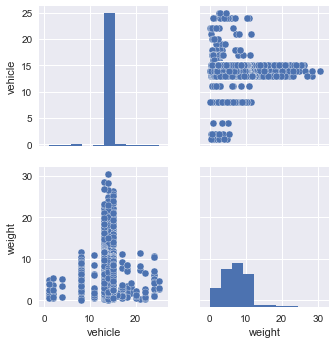

In [11]:
#Create pairplot with 2 columns
sns.pairplot(gw_dat_clean);

There are a couple of interesting observations. In the top-left distribution plot, of all the vehicles only a few of them seem to show up a significant number of times in the data. In the bottom-left scatterplot, we can see the most frequent observations look like they're originating from 3 vehicles in particular.

We can also see that all of the other vehicles tend to have a maximum of around 12t or so in the weight column (I will assume these are tonnes as it's the most likely measure but we are not actually told what it is). Whereas the 3 most frequent vehicles have carried up to 30 tons of waste as a maximum.

However, looking at the bottom-right distribution plot, these large weights seem to be infrequent as the majority of observations are around 12t or lower.

From these plots it looks like analysing the average weights and the number of waste collections for each vehicle might be interesting. Let's do that.

In [12]:
#Aggregate larger dataframe to show average weight per vehicle 
truck_avg_wgt = gw_dat_clean[['vehicle', 'weight']].groupby('vehicle').mean()
truck_avg_wgt = truck_avg_wgt.rename(columns= {'weight': 'avg_weight'})
truck_avg_wgt = truck_avg_wgt.sort_index()
truck_avg_wgt

,avg_weight
vehicle,
1,2.416667
2,2.205625
4,3.213333
8,6.079048
11,3.191250
13,7.213968
14,7.217858
15,6.898169
16,1.543125


In [13]:
#Obtain some simple statistics over the aggregated dataframe
truck_avg_wgt.describe()

,avg_weight
count,17.000000
mean,4.090617
std,2.100194
min,1.315600
25%,2.416667
50%,3.213333
75%,6.079048
max,7.217858


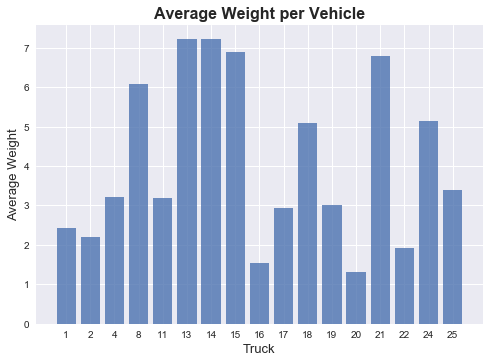

In [14]:
#Plot each vehicle and display its average weight
trucks = truck_avg_wgt.index
avg_weight = truck_avg_wgt['avg_weight']
x_axis = np.arange(len(trucks))

plt.bar(x_axis, avg_weight, alpha= 0.8)
plt.xticks(x_axis, trucks)
plt.title('Average Weight per Vehicle', size= 16, weight= 'bold')
plt.xlabel('Truck', size= 13)
plt.ylabel('Average Weight', size= 13)
plt.show()

The dataframe and the column chart confirm what we saw in the pairplots. While some vehicles have carried almost 30t of waste, the typical vehicle weight was much lower.

We can now see the mean of the average weight per vehicle is around 4.1t and the median is only 3.2t. In the 'Average Weight per Vehicle' chart above, it is also clear that the most frequently operating vehicles did not have significantly higher average weights than all other vehicles, despite on occasion carrying close to 30t of waste.

We still haven't worked out which are the 3 vehicles that appear to have made the most collections in the dataset. Vehicles 8, 13, 14, 15, 18, 21 and 24 stand out as they have an average weight that is higher than the mean and median of all vehicles in the data. Could the 3 vehicles be amongst this subset?

In [15]:
#Add number of collections per vehicle to average weight dataframe
collect_count = gw_dat_clean[['vehicle', 'weight']].groupby('vehicle').count()
truck_stats = truck_avg_wgt.copy()
truck_stats['collections'] = collect_count
truck_stats

,avg_weight,collections
vehicle,,
1,2.416667,6
2,2.205625,8
4,3.213333,3
8,6.079048,42
11,3.191250,16
13,7.213968,1275
14,7.217858,1123
15,6.898169,1163
16,1.543125,8


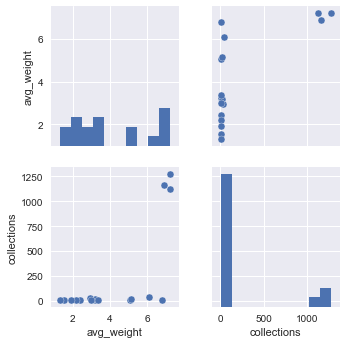

In [16]:
#Create pairplot with 2 columns
sns.pairplot(truck_stats);

In [17]:
#Sort new dataframe by average weight
truck_stats.sort_values(by= 'avg_weight', ascending= False)

,avg_weight,collections
vehicle,,
14,7.217858,1123
13,7.213968,1275
15,6.898169,1163
21,6.785000,4
8,6.079048,42
24,5.144667,15
18,5.078750,8
25,3.386667,3
4,3.213333,3


The answer to our previous question is, yes! The 3 vehicles with the most collections are also the ones that carried the highest average weight in waste, but not by a significant margin over the average weight of some other vehicles. 

What might be somewhat surprising is that these 3 vehicles have made over 1,000 collections each compared to the next highest at only 42, with many vehicles in single digits. This is particularly evident in the bottom-left scatterplot of the pairplot above, where we can see the cluster of 3 vehicles all the way in the top corner on their own. That's a lot larger of a gap between the other vehicles than I was expecting.

Perhaps vehicles 13, 14 and 15 are the main vehicles being used for green waste collections and the rest are just brought in when needed. Another possibility is that the vehicle numbers relate to driver tags and they might have 3 drivers whose main task is to collect green waste, while other drivers that mainly collect garbage or recycling can jump in on occasion to collect green waste.

Now let's try something different. We haven't had a look at the dates yet and how the data looks over time and during certain periods. We'll start with the weight of waste collected.

In [18]:
#Aggregate weight of waste collected by date
gw_by_date = gw_dat_clean.groupby('date')[['weight']].sum()
gw_by_date

,weight
date,
2016-07-04,19.580
2016-07-05,23.010
2016-07-06,23.990
2016-07-07,25.220
2016-07-08,25.000
2016-07-11,36.470
2016-07-12,43.280
2016-07-13,15.150
2016-07-14,29.800


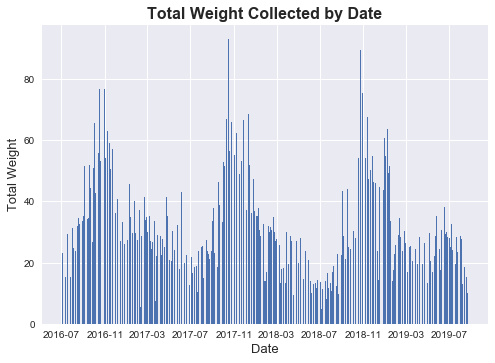

In [19]:
#Plot total weight collected by date
plt.bar(gw_by_date.index, gw_by_date['weight'])
plt.title('Total Weight Collected by Date', size= 16, weight= 'bold')
plt.xlabel('Date', size= 13)
plt.ylabel('Total Weight', size= 13)
plt.show()

Assessing the chart above on a day-by-day basis is very difficult with all the data points. However, we can immediately spot 3 peaks in the chart and these seem to appear around the same time of each year. It looks like there may be some seasonality to the weight of waste collected.

To confirm this, let's consolidate the data further by aggregating by month rather than day.

In [20]:
#Aggregate weight of total waste collected by calendar month
#First convert date values to yyyy-mm format, group and sum the total weight collected each month across each year
gw_by_month = gw_by_date.copy().reset_index()
gw_by_month['date_short'] = pd.to_datetime(gw_by_month['date']).dt.to_period('M')
gw_by_month = gw_by_month.groupby('date_short', as_index=False)[['weight']].sum()

#Create new month column as mm format only, group and find the mean weight collected each calendar month over all years 
gw_by_month['month'] = gw_by_month['date_short'].apply(lambda x: x.month)
gw_by_month = gw_by_month.groupby('month', as_index=False)[['weight']].mean()

#Rename columns, sort months by chronological order and convert month values from month number to month name
gw_by_month = gw_by_month.rename(columns= {'weight': 'avg_weight'})
gw_by_month = gw_by_month.sort_values(by= 'month', ascending= True)
gw_by_month['month'] = gw_by_month['month'].apply(lambda x: calendar.month_name[x])
gw_by_month

,month,avg_weight
0,January,714.545667
1,February,566.240000
2,March,531.936667
3,April,583.948000
4,May,586.604000
5,June,458.192000
6,July,449.470500
7,August,485.513750
8,September,764.355000
9,October,1233.165000


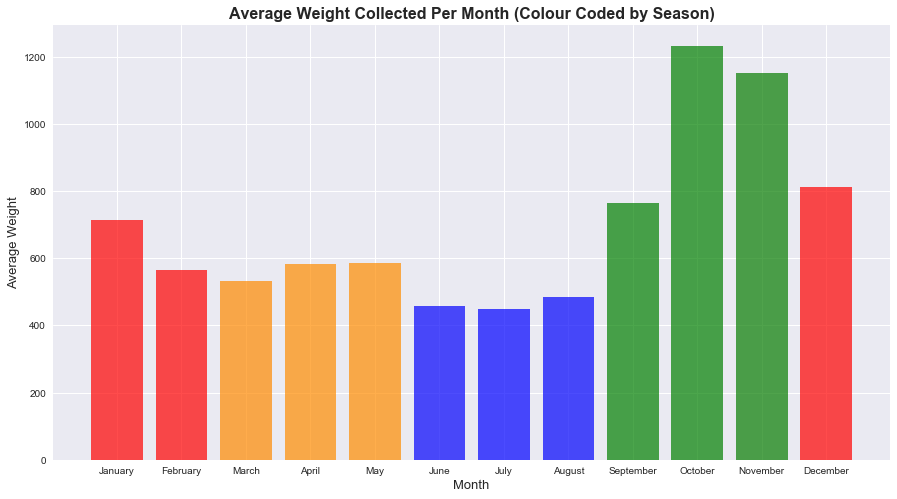

In [21]:
#Plot each calendar month and the mean weight collected as a bar plot with colour coding
#Set up axis values
months = gw_by_month['month']
avg_weight = gw_by_month['avg_weight']
x_axis = gw_by_month.index

#Assign colour palette for each season
colours = [(0/12, "red"), (1/12, "red"), (2/12, "darkorange"), (4/12, "darkorange"), (5/12, "blue"), 
         (7/12, "blue"), (8/12, "green"), (10/12, "green"), (11/12, "red"), (12/12, "red")]
rvb = mcolors.LinearSegmentedColormap.from_list(name='', colors=colours)
N = 12
i = np.arange(N).astype(float)

#Plot figure
fig = plt.figure(figsize=(15, 8))
plt.bar(x_axis, avg_weight, color=rvb(i/N), alpha=0.7)
plt.xticks(x_axis, months)
plt.title('Average Weight Collected Per Month (Colour Coded by Season)', size= 16, weight= 'bold')
plt.xlabel('Month', size= 13)
plt.ylabel('Average Weight', size= 13)
plt.show()

Not only have I created a plot of the average weight collected each calendar month but I have also colour coded each month by the season it belongs to. Why?

We already saw there were peaks in weight collected at certain times each year, which indicates some seasonality. That got me thinking about why this might be.

Intuitively, I would have thought green waste collections would be at their peak in the spring because this is when most people finally venture out into their gardens and get to work. Winter has passed, the weather has warmed up, plants like most fruits and vegetables can now begin to grow and it is the ideal time to plant other things like flowers and shrubs. So given the neglect over the cold winter, there would probably be a lot of things to clean up in the yard over this time to clear the ground for these new plants.

As it turns out, this is totally backed up by the data.

In Australia, spring is considered to begin in September. In the chart, there is a significant spike in weight collected through to October where it peaks on average. Then the weight slowly drops back over summer when most gardeners begin to slowly retreat as well. There is also a small rise from March through to May, which might be when people spend some time raking up Autumn leaves and dumping them into their green waste bins! Finally it all settles back down over winter, when people are busy staying warm indoors rather than freezing themselves in the garden.

The colour coding does a decent job of highlighting this seasonality in collections, but to provide an even clearer representation, let's aggregate the data by season as well.

In [22]:
#Create dictionary of calendar months and the season they belong to
summer = ['December', 'January', 'February']
autumn = ['March', 'April', 'May']
winter = ['June', 'July', 'August']
spring = ['September', 'October', 'November']
seasons = {'Summer': summer, 'Autumn': autumn, 'Winter': winter, 'Spring': spring}

#Lay out mapping criteria
inverse_map = dict((itm, key) for key in seasons for itm in seasons[key])

#Convert month column values to season and aggregate average weight collected by season
gw_by_season = gw_by_month.copy()
gw_by_season['month'] = gw_by_season['month'].map(inverse_map)
gw_by_season = gw_by_season.rename(columns={'month': 'season'})
gw_by_season = gw_by_season.groupby('season', as_index=False)['avg_weight'].sum()
gw_by_season.sort_values(by= 'season')
gw_by_season

,season,avg_weight
0,Autumn,1702.488667
1,Spring,3148.429333
2,Summer,2092.180000
3,Winter,1393.176250


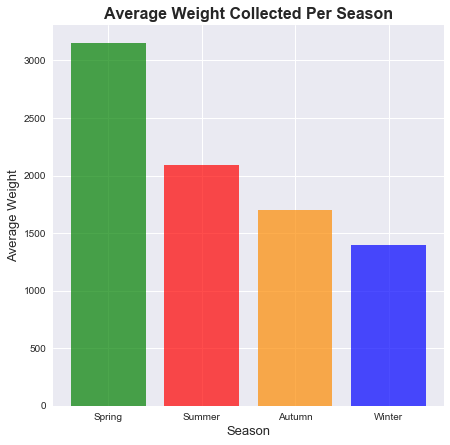

In [23]:
#Plot each season and the mean weight collected as a bar plot
#Re-order seasons by chronological order beginning with spring
season_order = {'Spring': 0, 'Summer': 1, 'Autumn': 2, 'Winter': 3}
gw_by_season['order'] = gw_by_season['season'].map(season_order)
gw_by_season = gw_by_season.set_index('order')
gw_by_season.sort_index(inplace=True)

#Set up axis values
y_axis = gw_by_season['avg_weight']
x_axis = gw_by_season.index
x_labels = gw_by_season['season']

#Assign colour palette for each season
colours = [(0/4, "green"), (1/4, "red"), (2/4, "darkorange"), (3/4, "blue"), (4/4, "blue")]
rvb = mcolors.LinearSegmentedColormap.from_list(name='', colors=colours)
N = 4
i = np.arange(N).astype(float)

#Plot figure
plt.figure(figsize=(7, 7))
plt.bar(x_axis, y_axis, color=rvb(i/N), alpha=0.7)
plt.xticks(x_axis, x_labels)
plt.title('Average Weight Collected Per Season', size= 16, weight= 'bold')
plt.xlabel('Season', size= 13)
plt.ylabel('Average Weight', size= 13)
plt.show()

Now we can clearly see the difference between each season. Weight collected is at its highest in spring and falls with each coming season until it is at its lowest during winter, the coldest season. The average weight collected in spring is more than double the amount collected in winter.

Since we have confirmed this seasonal pattern with weights, how about we go back to the vehicles and see if there is any trend with vehicle numbers over time.

In [24]:
#Aggregate number of vehicles collecting waste on each day
trucks_by_date = gw_dat_clean.copy()
trucks_by_date = trucks_by_date[['date', 'vehicle']].groupby('date').count()
trucks_by_date = trucks_by_date.rename(columns={'vehicle': 'vehicles'})
trucks_by_date

,vehicles
date,
2016-07-04,3
2016-07-05,3
2016-07-06,3
2016-07-07,2
2016-07-08,3
2016-07-11,3
2016-07-12,3
2016-07-13,3
2016-07-14,3


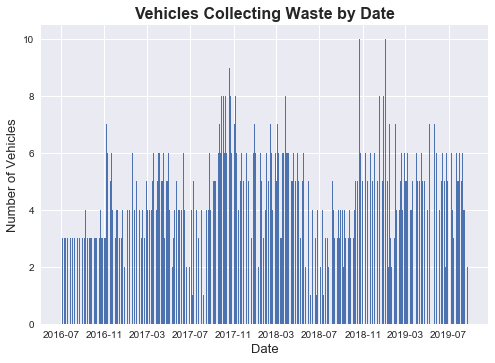

In [25]:
#Plot total vehicles collecting waste by date
plt.bar(trucks_by_date.index, trucks_by_date['vehicles'])
plt.title('Vehicles Collecting Waste by Date', size= 16, weight= 'bold')
plt.xlabel('Date', size= 13)
plt.ylabel('Number of Vehicles', size= 13)
plt.show()

Unlike the average weight chart over time, a pattern is not as obvious here. We can still make out 3 peaks around October or November each year, but they are nowhere near as clearly defined this time.

It also appears as though the number of vehicles may be trending up over time, but we cannot be sure. The last years' vehicle counts appear to be higher than the first, but it is very difficult to tell on this chart.

We will need to do some aggregation here as well in order to properly identify if there are any trends. We'll start by month.

In [26]:
#Aggregate the number of vehicles collecting waste by month across all years
trucks_by_date = trucks_by_date.reset_index()
trucks_by_date['date_short'] = pd.to_datetime(trucks_by_date['date']).dt.to_period('M')
trucks_by_date = trucks_by_date.groupby('date_short', as_index=False)[['vehicles']].sum()

#Add 2 new columns with just the month and the year as values
trucks_by_date['month'] = trucks_by_date['date_short'].apply(lambda x: x.month)
trucks_by_date['year'] = trucks_by_date['date_short'].apply(lambda x: x.year)
trucks_by_date['month'] = trucks_by_date['month'].apply(lambda x: calendar.month_name[x])

#Use 2 new columns to create string values for each month across all years
trucks_by_date['date_short'] = trucks_by_date['month'].astype(str) + ' ' + trucks_by_date['year'].astype(str)
trucks_by_date

,date_short,vehicles,month,year
0,July 2016,59,July,2016
1,August 2016,75,August,2016
2,September 2016,67,September,2016
3,October 2016,64,October,2016
4,November 2016,113,November,2016
5,December 2016,81,December,2016
6,January 2017,110,January,2017
7,February 2017,89,February,2017
8,March 2017,97,March,2017
9,April 2017,96,April,2017


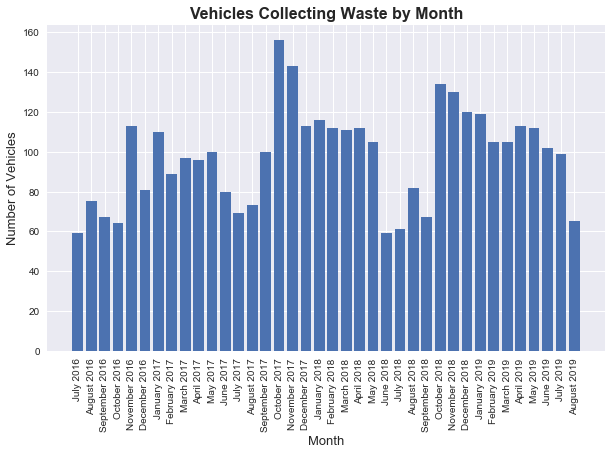

In [27]:
#Plot number of vehicles collecting waste by month across all years 
plt.figure(figsize=(10, 6))
plt.bar(trucks_by_date.index, trucks_by_date['vehicles'])
plt.xticks(trucks_by_date.index, trucks_by_date['date_short'], rotation= 90)
plt.title('Vehicles Collecting Waste by Month', size= 16, weight= 'bold')
plt.xlabel('Month', size= 13)
plt.ylabel('Number of Vehicles', size= 13)
plt.show()

The aggregated chart is easier to read, but is still not conclusive about any trends or seasonality. We could further consolidate the data by calendar month like we did for the average weight of waste collected, but then we would lose any information about trends.

Instead let's reconstruct the data into a dataframe with the year on one axis and the month on the other to see if we can plot a more informative chart.

In [28]:
#Create new dictionary to store vehicle collection data and iterate through existing dataframe to store values
trucks_trend = {}

for row in trucks_by_date.itertuples():
    if str(row.month) in trucks_trend:
        trucks_trend[str(row.month)].append(row.vehicles)
    else:
        if row.year > 2016:
            trucks_trend[str(row.month)] = [np.NaN, row.vehicles]
        else:
            trucks_trend[str(row.month)] = [row.vehicles]

#Fill in missing values with NaN
for key in trucks_trend:
    if len(trucks_trend[key]) < 4:
        trucks_trend[key].append(np.NaN)

#Convert dictionary to dataframe
trucks_trend = pd.DataFrame(trucks_trend)
trucks_trend['Year'] = list(map(str, [2016, 2017, 2018, 2019]))
trucks_trend = trucks_trend.set_index('Year')
trucks_trend

,April,August,December,February,January,July,June,March,May,November,October,September
Year,,,,,,,,,,,,
2016,NaN,75,81.0,NaN,NaN,59,NaN,NaN,NaN,113.0,64.0,67.0
2017,96.0,73,113.0,89.0,110.0,69,80.0,97.0,100.0,143.0,156.0,100.0
2018,112.0,82,120.0,112.0,116.0,61,59.0,111.0,105.0,130.0,134.0,67.0
2019,113.0,65,NaN,105.0,119.0,99,102.0,105.0,112.0,NaN,NaN,NaN


In [29]:
#Reorder columns by chronological order
month_list = list(np.arange(1,13))
month_list = [calendar.month_name[x] for x in month_list]
trucks_trend = trucks_trend[month_list]
trucks_trend

,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,NaN,NaN,59,75,67.0,64.0,113.0,81.0
2017,110.0,89.0,97.0,96.0,100.0,80.0,69,73,100.0,156.0,143.0,113.0
2018,116.0,112.0,111.0,112.0,105.0,59.0,61,82,67.0,134.0,130.0,120.0
2019,119.0,105.0,105.0,113.0,112.0,102.0,99,65,NaN,NaN,NaN,NaN


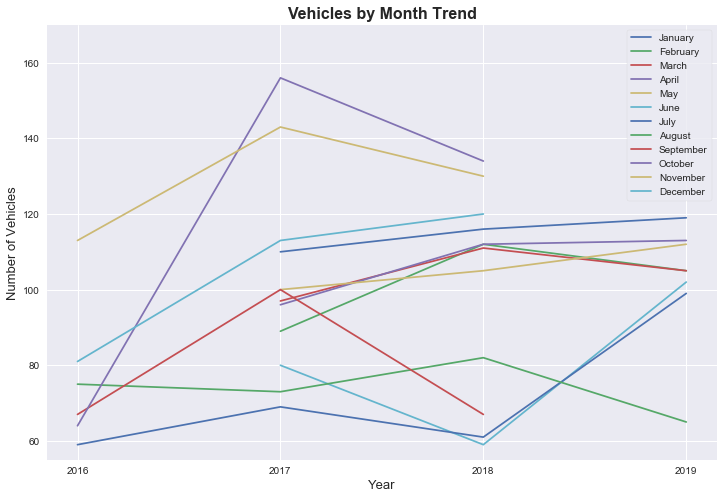

In [30]:
#Plot individual time series for each calendar month across all years of data 
t_t_size = np.arange(len(trucks_trend.columns))

fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('Vehicles by Month Trend', size= 16, weight= 'bold')
ax.set_xlabel('Year', size= 13)
ax.set_xticks(trucks_trend.index.astype(int))
ax.set_ylabel('Number of Vehicles', size= 13)
ax.set_ylim(55,170)

for i in t_t_size:
    ax.plot(trucks_trend.index, trucks_trend.iloc[:,i:i+1], label=trucks_trend.columns[i])

ax.legend(loc= 'upper right', frameon= True)
plt.show()

This chart is a little better than the column chart in that we can now see trends for individual calendar months, but it is still a little difficult to read due to the clutter of lines. Some trends are going up, some down and some are mixed or volatile.

I'm going to borrow a different type of chart from the field of share trading which may help to convey any trends without all the clutter. That is a candlestick chart. There are advantages and disadvantages to using a candlestick chart over the line chart above, which I'll discuss further down.

In [31]:
#Transpose dataframe and reset index to numbers corresponding to each month
t_t_trans = trucks_trend.copy().transpose()
t_t_trans = t_t_trans.reset_index()
t_t_trans

Year,index,2016,2017,2018,2019
0,January,NaN,110.0,116.0,119.0
1,February,NaN,89.0,112.0,105.0
2,March,NaN,97.0,111.0,105.0
3,April,NaN,96.0,112.0,113.0
4,May,NaN,100.0,105.0,112.0
5,June,NaN,80.0,59.0,102.0
6,July,59.0,69.0,61.0,99.0
7,August,75.0,73.0,82.0,65.0
8,September,67.0,100.0,67.0,NaN
9,October,64.0,156.0,134.0,NaN


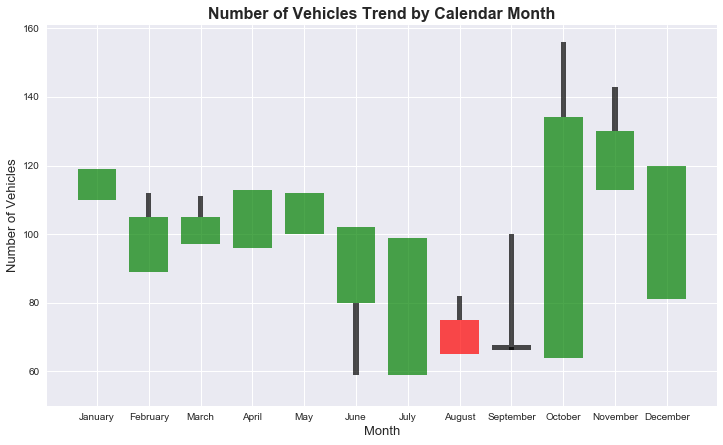

In [32]:
#Plot each calendar month's values over time on candlestick chart
#Set up figure and candlestick properties
plt.figure(figsize= (12, 7))
width_1 = 0.75
width_2 = 0.1
x_axis = []
x_labels = []

#Iterate through each month and plot values on chart
for row in t_t_trans.itertuples():
    
    #Obtain first, last, maximum and minimum values within row while ignoring NaN values
    tr_mo = pd.Series(row)
    
    x_pos = tr_mo[0] + 1
    x_axis.append(x_pos)
    
    if np.isnan(tr_mo[2]):
        first_val = tr_mo[3]
    else:
        first_val = tr_mo[2]
        
    if np.isnan(list(tr_mo)[-1]):
        last_val = list(tr_mo)[-2]
    else:
        last_val = list(tr_mo)[-1]
    
    max_val = tr_mo[2:].dropna().max()
    min_val = tr_mo[2:].dropna().min()
    
    #Set colour of candlstick for each month based on trend from first value to last value
    if first_val < last_val:
        chart_colour = 'green'
    elif first_val > last_val:
        chart_colour = 'red'
    else:
        first_val = first_val + 0.75
        last_val = last_val - 0.75
        chart_colour = 'black'
    
    x_labels.append(tr_mo[1])
    
    #Plot values on chart
    plt.bar(x_pos, max(first_val, last_val) - min(first_val, last_val), width= width_1, bottom= min(first_val, last_val), color= chart_colour, alpha= 0.7)
    plt.bar(x_pos, max_val - max(first_val, last_val), width= width_2, bottom= max(first_val, last_val), color= 'black', alpha= 0.7)
    plt.bar(x_pos, min(first_val, last_val) - min_val, width= width_2, bottom= min_val, color= 'black', alpha= 0.7)

#Display plot and add labels
plt.xticks(np.asarray(x_axis), np.asarray(x_labels))
plt.title('Number of Vehicles Trend by Calendar Month', size= 16, weight= 'bold')
plt.xlabel('Month', size= 13)
plt.ylabel('Number of Vehicles', size= 13)
plt.ylim(ymin= 50)
plt.show()

This candlestick chart shows a much clearer picture than the line chart above.

#### A bit about candlesticks 

The months with a green bar show trends where the total number of vehicles in the final year are greater than the first year and vice versa for months with a red bar. September had no change and so is depicted by a horizontal black line. The top and bottom of each bar corresponds to the value in the starting and ending years.

The black lines extending through the top or bottom of each bar are called 'wicks'. They represent the range of values that occurred after the start year but before the end year. As an example we see June's first year vehicle count value is around 80 and it's end year value is just over 100. However, between the start and end, we observed a yearly value that dropped below 60.

One of the disadvantages of this chart is that although we can easily see the start to finish trend for each month and we also see the ranges in between, we do lose information about the trajectory of these changes in between. For example, in August  we see that the first year value was around 75 and the last year value was around 65. We can also see that during the middle 2 years, at some point we had a value of over 80. However, what we don't see is during which of those two years did that value occur and also what happened in the 1 year where we did not observe an extreme value?

This is not too much of an issue with just 4 observation points but we can lose much more information with a longer timeframe.

#### Back to the data

Now that we have sense for how the chart works, what can we see?

Generally, the trend is upwards in terms of vehicles collecting waste. In 10 out of 12 calendar months, the number of vehicles running were greater in the last year than the first year of data. The number of vehicles went down in only 1 out of the 12 months.

We can also see the ranges of values are much wider for June to December than they are for January to May. The actual values themselves are also very similar from Jan to May hovering around the 100 mark, whereas Jun to Dec shows some values down near 60 and others near 160. This is somewhat curious as it doesn't necessarily correspond to the observations from the average weight per month chart we did earlier.

There appears to be little correlation between the number of vehicles vs the average weight of waste being brought back to the depot. Let's check this and run some correlation statistics on the number of vehicles being used each month vs the average weight of waste collected.

In [33]:
#Setup dictionary to store last year values 
last_vehicles = {'last_vehicles': []}
last_vehicles_vals = []

#Iterate through each month and obtain the last year's value 
for row in t_t_trans.itertuples():
    
    tr_mo = pd.Series(row)
    
    if np.isnan(list(tr_mo)[-1]):
        last_vehicles_vals.append(list(tr_mo)[-2])
    else:
        last_vehicles_vals.append(list(tr_mo)[-1])

#Fill dictionary with values from iteration
last_vehicles['last_vehicles'] = last_vehicles_vals
last_vehicles

#Combine average weight collected with average number vehicles collecting waste across all years and the number of vehicles
#in the last year into a dataframe.
wv_by_month = gw_by_month.copy()
wv_by_month['avg_vehicles'] = t_t_trans.mean(axis= 1)
wv_by_month['last_vehicles'] = last_vehicles['last_vehicles']
wv_by_month

,month,avg_weight,avg_vehicles,last_vehicles
0,January,714.545667,115.000000,119.0
1,February,566.240000,102.000000,105.0
2,March,531.936667,104.333333,105.0
3,April,583.948000,107.000000,113.0
4,May,586.604000,105.666667,112.0
5,June,458.192000,80.333333,102.0
6,July,449.470500,72.000000,99.0
7,August,485.513750,73.750000,65.0
8,September,764.355000,78.000000,67.0
9,October,1233.165000,118.000000,134.0


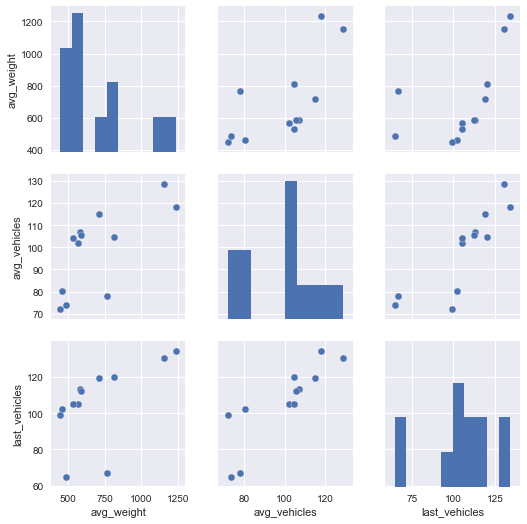

In [34]:
#Create pairplot with the 3 columns
sns.pairplot(wv_by_month);

In [35]:
#Generate correlation matrix
wv_by_month.corr()

,avg_weight,avg_vehicles,last_vehicles
avg_weight,1.000000,0.688290,0.574491
avg_vehicles,0.688290,1.000000,0.847205
last_vehicles,0.574491,0.847205,1.000000


Visually on the pairplots it appears that there is a rough relationship between the number of vehicles collecting waste and the average weight of waste being collected, but it doesn't appear to be too strong and there are also some outliers.

This is confirmed by the correlation matrix, which shows that the correlation between the average number of vehicles and the average weight is 0.69. Depending on the problem you are looking at or the industry in which you work, this could actually be a considered a very strong correlation. However, in this context one might feel the collection depot may be able to improve its management of vehicle numbers collecting waste compared to the amount of waste being collected.

I also took just the last year's vehicle count to see if maybe their management has improved over time, but in fact the correlation to average weight has gone down to 0.57.

Of course, this is a very simplistic view of the situation and there are many other factors when managing the number of vehicles being sent out. There may be set routes that need to be adhered to or a small number of trucks may not be enough to efficiently visit each property in the area. In any case, if you were working for the collection depot this might be a part of the operation where you would look at making some improvements through data analysis.

#### The final word

We could go on and on analysing this dataset, but I will leave it there. We began by simply wanting to explore a 3 column dataset and ended up with 12 visualisations, even more dataframes covering things like average weights per vehicle, average weight by date, average vehicles by date and then tying that all together with some correlations.

I believe I have achieved my goal of proving that you can do a lot even with such a small amount of data.

As I mentioned, I am relatively new to Data Science so I am sure there are likely to be more efficient or elegant ways of doing some of the data manipulations than what I have done here. In fact while working on this notebook I came across some more efficient ways of coding a few of the manipulations I had already done.

In subsequent notebooks I will be concentrating more Data Science style statistical learning and modelling rather than just data manipulation.

Thank you for viewing my work and I welcome any critiques or suggestions.